<font size="+2.5" color='#27408B'><b> Capstone Project: Insurance Fraud Detection Analytics </b> </font>


This capstone project has a lifecycle analytics process with two parts in two separated notebooks:

**❏  Part 1: Exploratory Data Analysis (this notebook: Fraud Detection Analytics Part 1 EDA & Data Preparation.ipynb)**
 - Data Input: carclaims.csv (raw data: https://www.kaggle.com/code/rashmiek99/vehicle-insurance-fraud-detection)
 - Data Output: df4_encoded (cleaned and ready for modeling in Part 2)

**❏  Part 2: Predictive Analytics (second notebook: Fraud Detection Analytics Part 2 Predictive Analytics.ipynb)**


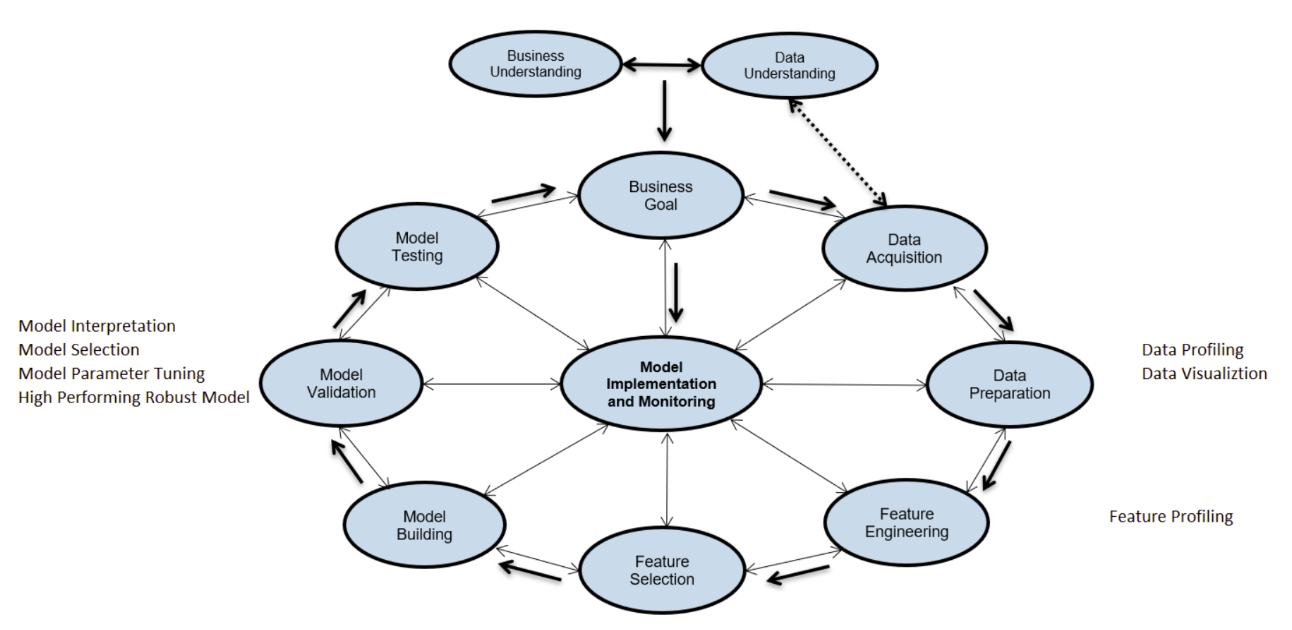
***

####  ❏ Part 1: Exploratory Data Analysis

### Section 1. Problem statement
### Section 2. Datasets & Environment you want to use
### Section 3. Exploratory Data Analysis
#### 3.1.	Initial Exploratory Data Review
#### 3.2.	Individual Variable Review and Visualization
#####  3.2.1. Target Variable / Label
#####  3.2.2. Continuous Variables
#####  3.2.3. Categorical Variables
     
#### 3.3 EDA Summary

#### 1. Overall Fraud Rate: The target variable / label shows only 6% of Claims are detected as Fraud which dataset is extremely imbalanced
  - Fraud cases: 923 (5.99%)
  - Non-fraud cases: 14,497 (94.01%) ➡️ Fraud is relatively rare, but patterns emerge across certain categories.

#### 2. Temporal Patterns
  - Months: Fraud peaks in March (7.5%), August (7.45%), and May (7.23%); lowest in November (3.83%).
  - Days of Week: Higher fraud on weekends (Saturday 6.66%, Sunday 6.99%) compared to weekdays.
  - Claim Timing: Mismatches between accident and claim dates show elevated fraud risk.

#### 3. Vehicle & Policy Features
  - Vehicle Category: Utility (11.25%) → highest fraud risk; Sedan (8.22%) → moderate risk; Sport (1.57%) → lowest risk.
  - Policy Type: Sport-Collision (13.79%), Utility-All Perils (12.06%), Sedan-All Perils (10.05%) → high risk; Sedan-Liability (0.72%) → very low risk.
  - Base Policy: All Perils (10.16%) shows higher fraud than Collision (7.29%) or Liability (0.72%).
  - Vehicle Price: Fraud is higher in low (<20k, 9.4%) and high (>69k, 8.7%) price ranges.

#### 4. Demographics
  - Sex: Males (6.29%) show higher fraud than females (4.34%).
  - Marital Status: Widows (8.57%) and divorced (3.95%) show elevated risk compared to married/single (~6%).
  - Age of Policy Holder: Younger policyholders are disproportionately associated with fraud.
    - 18–25 years → highest fraud (13–15%) vs. Older groups (41–65) → lower fraud (~5%).

#### 5. Claim & Accident Details
  - Fault: Policy Holder at fault → 7.89% fraud; Third Party at fault → 0.88%.
  - Accident Area: Rural (8.32%) vs. Urban (5.72%).
  - Police Report Filed: Fraud lower when reports are filed (3.74% vs. 6.05%).
  - Witness Present: Fraud lower when witnesses are present (3.45% vs. 6.0%).
    ➡️ Lack of external verification (no police report, no witness) correlates with higher fraud.

### Key Insights
 - Fraud prevalence: Overall fraud is rare (~6%), but concentrated in specific demographics and policy/vehicle types.
 - Demographics: Younger drivers (18–25 years, 13–15% fraud), males (6.29%), and widowed policyholders (8.57%) show elevated risk compared to other groups.
 - Vehicle Category: Utility vehicles (11.25%) are riskiest, while Sport vehicles (1.57%) are lowest.
 - Policy Type: Complex policies such as Sport - Collision (13.79%), Utility - All Perils (12.06%), and Sedan - All Perils (10.05%) stand out as high-risk.
 - Seasonality: Fraud risk spikes in March (7.5%) and August (7.45%), with the lowest in November (3.83%).
 - Location & Evidence: Fraud is more common in rural areas (8.32%) and when no police report or witness is filed, suggesting external verification reduces fraud.
 - High-risk combinations: Profiles such as young male + Utility vehicle + All Perils policy represent strong predictive signals for modeling.
   
### Section 4. Data Preparation
#### 4.1 Data Cleaning 
#### Data Cleaning Summary:
   - Some minor data cleaning was performed given there were no obvious missing values but some zero and none values
   - There were 15K unique PolicyNumbers,  which were not included as it is not meaningful for  this analysis
   - 'RepNumber','Deductible' data fields were dropped from this analysis due to insignificant contribution to fraud detection

#### 4.2. Feature Engineering
 - grouping by similar fraud risk/rate
 - creating indicator for very high or low fraud risk/rate
 - Feature Engineering Summary: data fields were regrouped based on similar fraud risk for benefits:
       - Stability (avoids inflated fraud % from tiny sample sizes),
       - Interpretability (easier to explain risk by broad categories)
       - Model performance (reduces dimensionality and prevents overfitting to rare categories).
#### 4.3. Encoding: Data was encoded for correlation review and modeling
 - Initial Correlation Review and Quick Feature Selection: 
        - 20 binary variables were selected from around 100 binary variables for baseline models
 - Scaling - no need in this dataset and use case

### Section 5. Preprocessing
#### 5.1. Splitting into train and test sets for modeling
#### 5.2. Upsampling to address the imbalanced data
 - The dataset is extremely imbalanced so the model performance is poor. To address the imbalanced target data concern, I did two ways:
    1) Upscale the Minority Class    (where FraudFound ==1) -- this was included in this notebook   
    2) Downsample the Majority Class (where FraudFound ==0) --> this was tested with similar results and not included in this notebook due to space concern 

### Section 6. Feature Selection
 - Feature Importance Ranking
 - Correlation Review
### Section 7. Modeling

- Logistic Regression   
- Decision Tree 
- Random Forest  
- Gradient Boosting
- XGBoost

- Deep Learning models, often called deep neural networks: Unlike traditional machine learning, which often requires manual feature extraction, deep learning models automatically learn to extract relevant features from raw data. 

Model Optimization: model tuning, testing, and validation to ensure generalizability
 -5-fold CV, Model Optimization: model tuning, testing, and validation to ensure generalizability

 - Utilize Hyperparameter tuning and grid search to improve model performance
 - 
### Section 8. Model Evaluation

### Next Steps and Recommendations
1. Data Expansion: Investigate outliers and potential sampling biases
2. Multicollinearity Review: Use techniques like PCA or VIF to manage highly correlated features
3. Feature Engineering: Create meaningful features, composite features, and/or interaction terms.
	e.g.: Consider combining variables into interaction terms and review if the joint effect seems significant or not.


***

#### Section 1. Problem statement

•	**Goal**: Develop a scalable analytics solution to identify and prioritize potentially fraudulent claims for investigation, minimizing financial loss and operational drag.

•	**Impact**: Insurance fraud costs U.S. consumers and businesses over `$308 billion annually`, with property and casualty fraud contributing `~$90 billion`.

•	**Strategic Value**: Enabling insurers to flag suspicious claims for investigation, reducing false positives, and accelerating legitimate claim processing.

•	**Stakeholders**: Claims adjusters, SIU (Special Investigations Unit), underwriting teams, compliance officers

#### Section 2. Datasets & Environment you want to use
 - Dataset: carclaims.csv or https://www.kaggle.com/code/rashmiek99/vehicle-insurance-fraud-detection 
    - Number of row / records: 15420; Number of column: 33 (one is PolicyNumber)
    - There 32 features in a total of which 6 are ordinal, 25 are categorical
    - The class variable "Fraudfound" (“fraud” or “not-fraud”) is the target/label: It consists of 15,420 records of which only 6% (923 records) are fraudulent.
 - Environment: Anaconda or Google Colab

#### Section 3. Exploratory Data Analysis

- 3.1.	Initial Exploratory Data Review
- 3.2.	Individual Variable Review and Visualization
        - 3.2.1. Target Variable / Label
        - 3.2.2. Continuous Variables
        - 3.2.3. Categorical Variables
- 3.3 EDA Summary

##### 3.1.	Initial Exploratory Data Review

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Utility Functions
def df_eds(df,head_size = 5, tail_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    print_heading("Data Review Summary")
    print_heading("Data Table: Row x Column")                            # Review # of Row x By of Column
    print("Number of Row / Records:",df.shape[0])
    print("Number of Column / Features / Data Fields:",df.shape[1])

    print_heading("Review Top 5 Rows:")                                  # Review Top 5 Rows
    display(df.head(head_size))    
    # print_heading("Review Bottom 5 Rows:")                              
    # display(df.tail(tail_size))
    
    print_heading("Review Descriptive Statistics:")                      # Review Descriptive Statistics
    display(df.describe().transpose())
    # df_hc['col'].value_counts(normalize = True)
    
    if show_info:
    
        print_heading("Review Data Table: Column Names and Data Types")  # Review Column Names and Data Types
        display(df.info())
    
        # print_heading("Data Table: Most frequent value")                 # Review Column Names and Data Types
        # display(df[col].mode())
     
        print_heading("Review Unique Values by Column:")                 # Review Unique Values by Column
        display(df.nunique())

        print_heading("Review Duplicated Row(s):")                       # Review Duplicated Values by Column
        display(df[df.duplicated()].shape[0])
        
        # gapminder.continent.unique()
        print_heading("Review Total Missing Values (1) isnull")             # Review isnull Missing Values By Column
        display(df.isnull().sum())                           
        # Percentage of missing values
        print_heading("Review % isnull Missing Values by Column:")       # Review Missing Values By Column
        isnull_val = df.isnull().sum()        
        isnull_val_percent = 100 * df.isnull().sum() / len(df)
         # Make a table with the results
        isnull_val_table = pd.concat([isnull_val, isnull_val_percent], axis=1)
        # Rename the columns
        isnull_val_table_ren_columns = isnull_val_table.rename(
        columns = {0 : 'isnullMissing Values', 1 : '%isnull of Total Values'})
        # Sort the table by percentage of missing descending
        isnull_val_table_ren_columns = isnull_val_table_ren_columns[
            isnull_val_table_ren_columns.iloc[:,1] != 0].sort_values('%isnull of Total Values', ascending=False).round(1)        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(isnull_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")        
        # Return the dataframe with missing information
        #return isnull_val_table_ren_columns
        
        print_heading("Review isna Total Missing Values (2) isna:")               # Review isna Missing Values By Column
        display(df.isna().sum())                                  
        # Percentage of missing values
        print_heading("Review % isna Missing Values by Column:")         # Review Missing Values By Column
        isna_val = df.isna().sum()        
        isna_val_percent = 100 * df.isna().sum() / len(df)    

        
        isna_val_table = pd.concat([isna_val, isna_val_percent], axis=1)
        # Rename the columns
        isna_val_table_ren_columns = isna_val_table.rename(
        columns = {0 : 'isnaMissing Values', 1 : '%isna of Total Values'})        
        # Sort the table by percentage of missing descending
        isna_val_table_ren_columns = isna_val_table_ren_columns[
            isna_val_table_ren_columns.iloc[:,1] != 0].sort_values('%isna of Total Values', ascending=False).round(1)        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(isna_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")        
        # Return the dataframe with missing information
        #return isna_val_table_ren_columns
        
        # df.isna().sum().sort_values(ascending=False).plot(kind = 'bar')    # df.isna().sum()    
        # plt.show()
        
def print_heading(heading):
    print("\n" + "="*50)
    print(heading)
    print("="*50)

# Function to print brief info for the given DataFrame object and column
def print_col_info(df, col):
    print(f"\nColumn: Review {col}")
    print(df[col].value_counts(normalize=True, sort=True, ascending=False))
    print(f"Unique values: {df[col].nunique()}\n")    
    print(f"Most frequent: {df[col].mode()}\n")
    print(f"Missing values: {df[col].isnull().sum()}\n")

In [16]:
df = pd.read_csv("carclaims.csv")
df.shape

(15420, 33)

In [17]:
df_eds(df)


Data Review Summary

Data Table: Row x Column
Number of Row / Records: 15420
Number of Column / Features / Data Fields: 33

Review Top 5 Rows:


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No



Review Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0



Review Data Table: Column Names and Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  

None


Review Unique Values by Column:


Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int


Review Duplicated Row(s):


0


Review Total Missing Values (1) isnull


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


Review % isnull Missing Values by Column:
Your selected dataframe has 33 columns.
There are 0 columns that have missing values.

Review isna Total Missing Values (2) isna:


Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64


Review % isna Missing Values by Column:
Your selected dataframe has 33 columns.
There are 0 columns that have missing values.


##### Summary
1. There are no many missing values but some zeros and/or none
2. There are no duplicate rows
3. PolicyNumber has 15420 unique values which are the unique IDs so should not be used for the purpose of this analysis.        

##### 3.2. Individual Variable Review and Visualization
   - Target Variable / Label: FraudFound
   - Continuous Variables
   - Categorical Variables

#####  3.2.1. Target Variable / Label: FraudFound

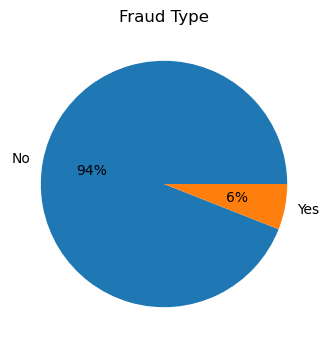

In [18]:
#create pie chart
plt.figure(figsize=(5,4))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

**Note**: The target variable / label shows only 6% of Claims are detected as Fraud which dataset is extremely imbalanced

#####   3.2.2. Continuous Variables

In [19]:
num_col = df.select_dtypes(include=['float64', 'int64']).drop(['PolicyNumber'], axis=1).columns.tolist()
num_col

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

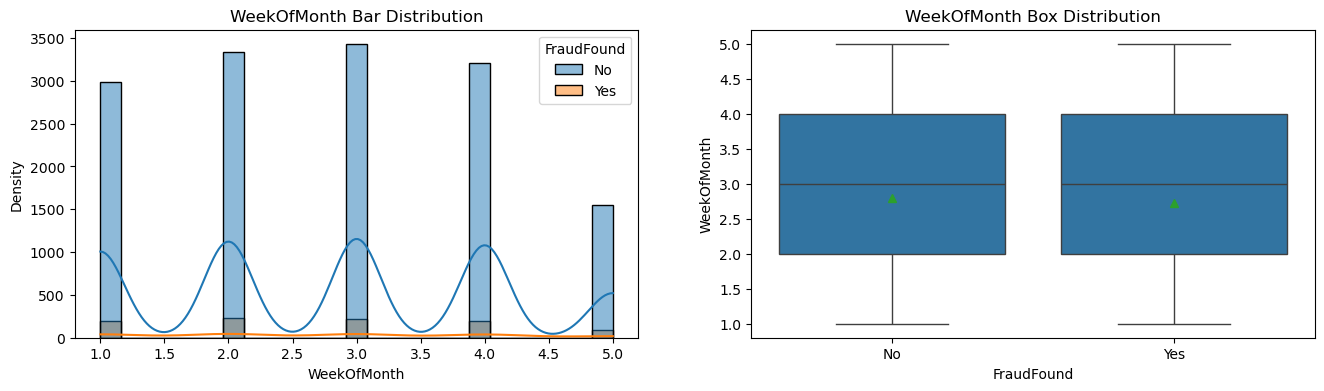

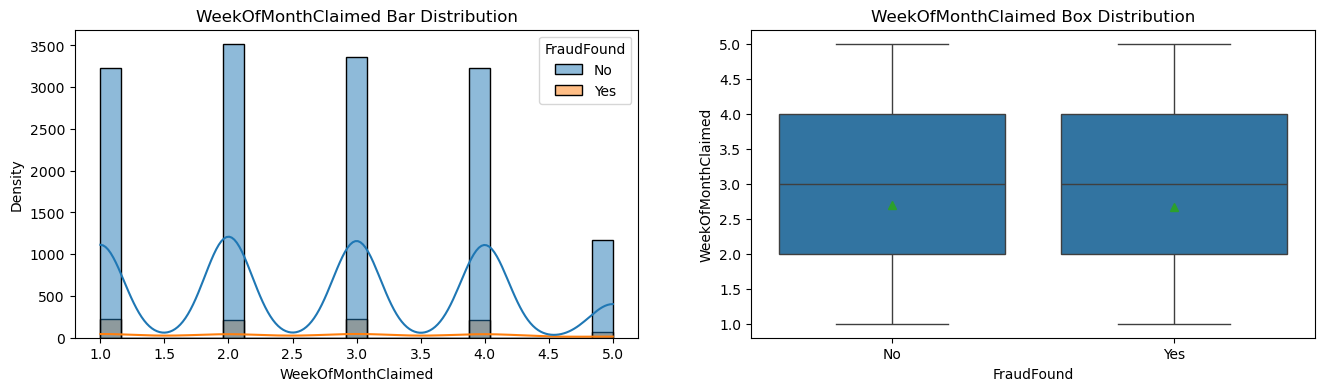

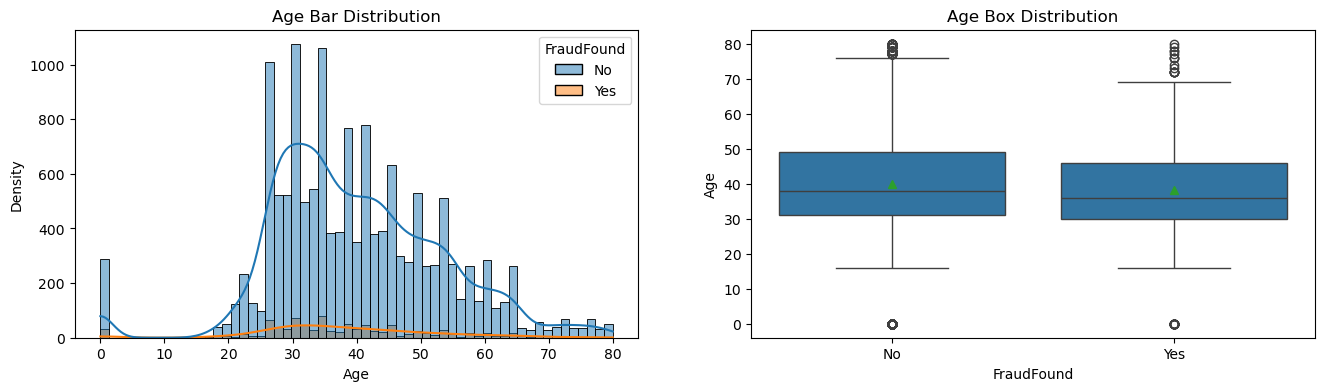

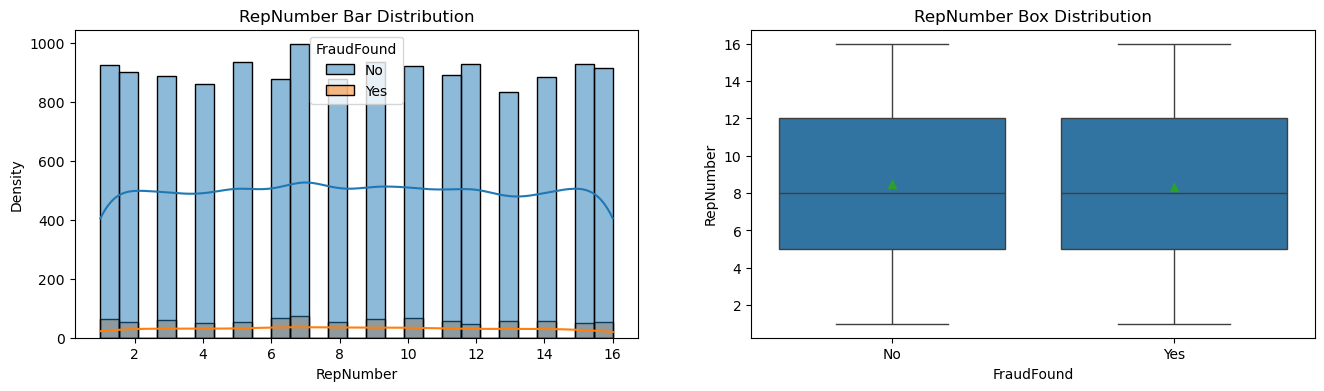

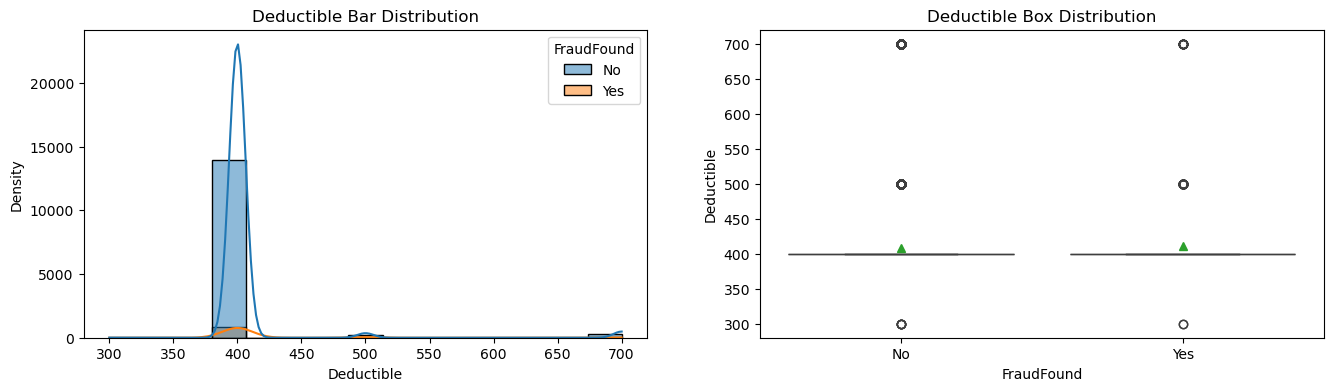

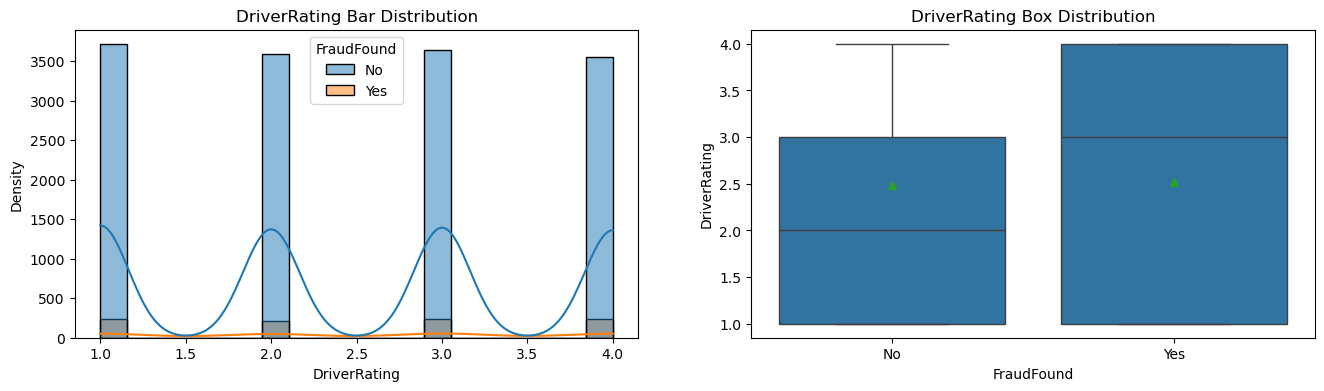

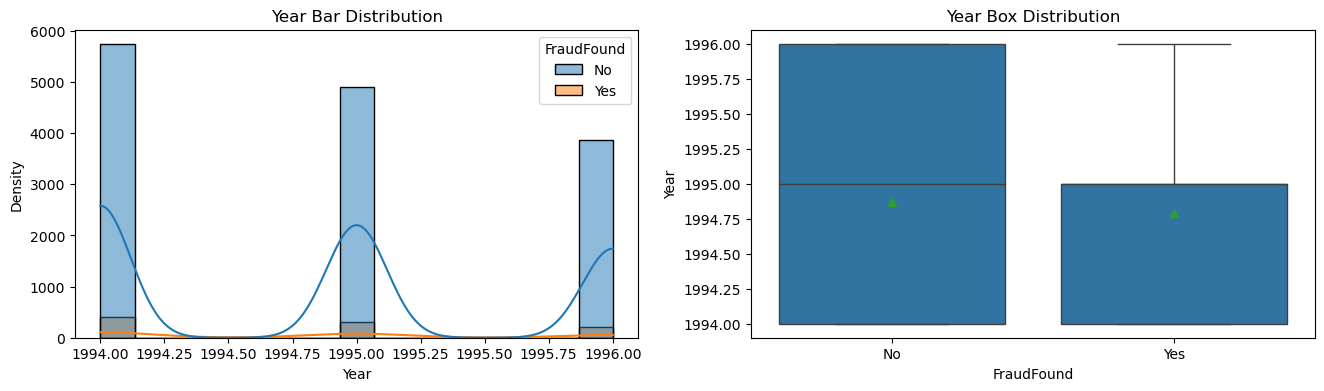

In [20]:
# add bar&box plot for each numeric variable 

for column in num_col:
    # set the figure size 
    plt.figure(figsize=(16,4))
    
    # draw the bar chart
    plt.subplot(1,2,1)
    #sns.distplot(df1[column], hue='FraudFound')
    sns.histplot(data=df, x=column, hue='FraudFound', kde=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'{column} Bar Distribution')
    
    # draw the box chart, group by "y"
    plt.subplot(1,2,2)
    sns.boxplot(x='FraudFound', y=column, data =df, showmeans=True )
    plt.xlabel('FraudFound')
    plt.ylabel(column)
    plt.title(f'{column} Box Distribution')

    plt.show()
    print()

In [21]:
# IT seems all the numeric variables can be converted to object data type

# Convert them to object dtype
df[num_col] = df[num_col].astype("object")

# Verify conversion
print(df[num_col].dtypes)

WeekOfMonth           object
WeekOfMonthClaimed    object
Age                   object
RepNumber             object
Deductible            object
DriverRating          object
Year                  object
dtype: object


##### 3.2.3. Categorical Variable

In [22]:
cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()
len(cat_col)

32

In [23]:
# Replace the Labels to 0 and 1

df['FraudFound'] = df['FraudFound'].map({'Yes': 1, 'No': 0})
df['FraudFound'].value_counts()

# df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
# df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

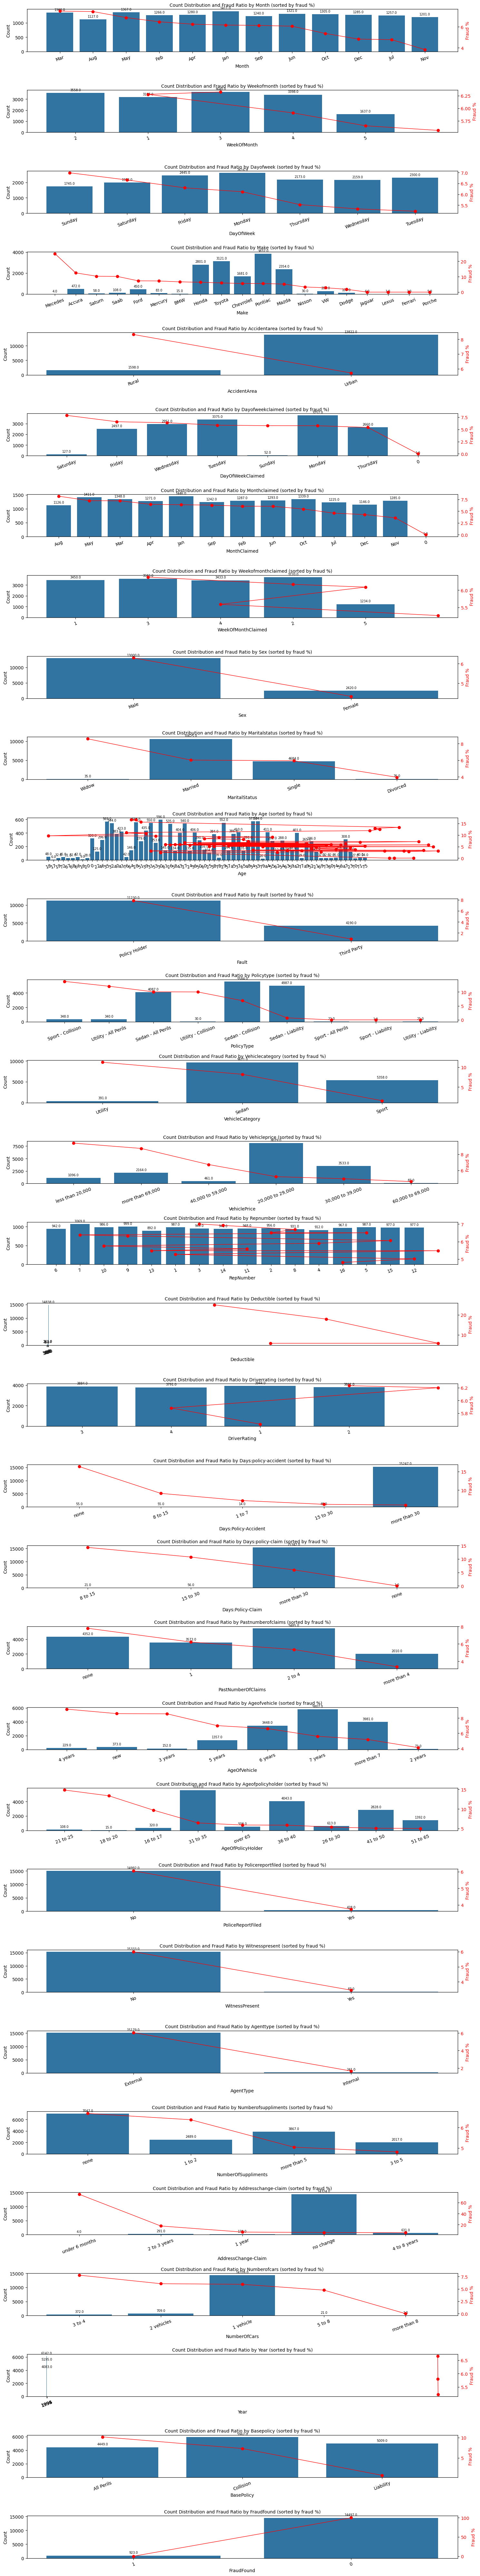

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

rows, cols = 32, 1
fig, axes = plt.subplots(rows, cols, figsize=(15, 80))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    # Compute fraud ratio per category
    fraud_ratio = df.groupby(col)["FraudFound"].mean() * 100
    
    # Sort categories by fraud ratio descending
    sorted_categories = fraud_ratio.sort_values(ascending=False).index
    
    # Bar plot for counts with sorted categories
    sns.countplot(data=df, x=col, ax=axes[i], order=sorted_categories)
    axes[i].set_title(f"Count Distribution and Fraud Ratio by {col.capitalize()} (sorted by fraud %)", fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=20)

    # Add counts on top of bars
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].annotate(
                f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=7, color='black', xytext=(0, 3),
                textcoords='offset points'
            )

    # Fraud ratio line plot (overlay)
    ax2 = axes[i].twinx()
    ax2.plot(fraud_ratio.loc[sorted_categories].index,
             fraud_ratio.loc[sorted_categories].values,
             color="red", marker="o", linestyle="-", linewidth=1)
    ax2.set_ylabel("Fraud %", fontsize=10, color="red")
    ax2.tick_params(axis='y', labelcolor="red")

# Remove empty subplots if fewer than grid size
for j in range(len(cat_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 3.3 EDA Summary

##### 3.3.1. Overall Fraud Rate: The target variable / label shows only 6% of Claims are detected as Fraud which dataset is extremely imbalanced
  - Fraud cases: 923 (5.99%)
  - Non-fraud cases: 14,497 (94.01%) ➡️ Fraud is relatively rare, but patterns emerge across certain categories.

##### 3.3.2. Temporal Patterns
  - Months: Fraud peaks in March (7.5%), August (7.45%), and May (7.23%); lowest in November (3.83%).
  - Days of Week: Higher fraud on weekends (Saturday 6.66%, Sunday 6.99%) compared to weekdays.
  - Claim Timing: Mismatches between accident and claim dates show elevated fraud risk.

##### 3.3.3. Vehicle & Policy Features

  - Vehicle Category:
    - Utility (11.25%) → highest fraud risk.
    - Sedan (8.22%) → moderate risk.
    - Sport (1.57%) → lowest risk.

  - Policy Type:
    - Sport - Collision (13.79%), Utility - All Perils (12.06%), Sedan - All Perils (10.05%) → high risk.
    - Sedan - Liability (0.72%) → very low risk.
      

  - Base Policy: All Perils (10.16%) shows higher fraud than Collision (7.29%) or Liability (0.72%).

  - Vehicle Price: Fraud is higher in low (<20k, 9.4%) and high (>69k, 8.7%) price ranges.

##### 3.3.4. Demographics
  - Sex: Males (6.29%) show higher fraud than females (4.34%).
  - Marital Status: Widows (8.57%) and divorced (3.95%) show elevated risk compared to married/single (~6%).
  - Age of Policy Holder: Younger policyholders are disproportionately associated with fraud.
    - 18–25 years → highest fraud (13–15%).
    - Older groups (41–65) → lower fraud (~5%).

##### 3.3.5. Claim & Accident Details
  - Fault: Policy Holder at fault → 7.89% fraud vs. Third Party at fault → 0.88%.
  - Accident Area: Rural (8.32%) vs. Urban (5.72%).
  - Police Report Filed: Fraud lower when reports are filed (3.74% vs. 6.05%).
  - Witness Present: Fraud lower when witnesses are present (3.45% vs. 6.0%).
    - Lack of external verification (no police report, no witness) correlates with higher fraud.

### Key Insights
 - Fraud prevalence: Overall fraud is rare (~6%), but concentrated in specific demographics and policy/vehicle types.
 - Demographics: Younger drivers (18–25 years, 13–15% fraud), males (6.29%), and widowed policyholders (8.57%) show elevated risk compared to other groups.
 - Vehicle Category: Utility vehicles (11.25%) are riskiest, while Sport vehicles (1.57%) are lowest.
 - Policy Type: Complex policies such as Sport - Collision (13.79%), Utility - All Perils (12.06%), and Sedan - All Perils (10.05%) stand out as high-risk.
 - Seasonality: Fraud risk spikes in March (7.5%) and August (7.45%), with the lowest in November (3.83%).
 - Location & Evidence: Fraud is more common in rural areas (8.32%) and when no police report or witness is filed, suggesting external verification reduces fraud.
 - High-risk combinations: Profiles such as young male + Utility vehicle + All Perils policy represent strong predictive signals for modeling.

***

***

### Section 4. Data Preparation
#### 4.1. Data Cleaning 
#### 4.2. Feature Engineering 
  - Regrouping by similar fraud risk/ratio
  - Create indicators for significantly high/low fraud risk ratio
#### 4.3. Encoding
#### 4.4. Initial Correlation Analysis Review and Quick Feature Selection


#### 4.1 Data Cleaning
 - There are a few columns with value of 0 which was replaced by the most frequent values
 - PolicyNumber data field is not meaningful so dropped from this analysis 

In [25]:
# Get categorical columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()

total_imputed = 0  # counter for all replacements

for column in cat_col:
    # Count how many '0' values exist before replacement
    imputed_count = (df[column] == '0').sum()
    total_imputed += imputed_count
    
    # Find the most frequent value (excluding '0')
    most_freq = df.loc[df[column] != '0', column].mode()[0]
    
    # Replace '0' with the most frequent value
    df[column] = df[column].replace('0', most_freq)
    
    # Print per-column imputation count
    print(f"Column '{column}': {imputed_count} records imputed")

print(f"\nImputation complete! Total records imputed across all categorical columns: {total_imputed}")

Column 'Month': 0 records imputed
Column 'WeekOfMonth': 0 records imputed
Column 'DayOfWeek': 0 records imputed
Column 'Make': 0 records imputed
Column 'AccidentArea': 0 records imputed
Column 'DayOfWeekClaimed': 1 records imputed
Column 'MonthClaimed': 1 records imputed
Column 'WeekOfMonthClaimed': 0 records imputed
Column 'Sex': 0 records imputed
Column 'MaritalStatus': 0 records imputed
Column 'Age': 0 records imputed
Column 'Fault': 0 records imputed
Column 'PolicyType': 0 records imputed
Column 'VehicleCategory': 0 records imputed
Column 'VehiclePrice': 0 records imputed
Column 'RepNumber': 0 records imputed
Column 'Deductible': 0 records imputed
Column 'DriverRating': 0 records imputed
Column 'Days:Policy-Accident': 0 records imputed
Column 'Days:Policy-Claim': 0 records imputed
Column 'PastNumberOfClaims': 0 records imputed
Column 'AgeOfVehicle': 0 records imputed
Column 'AgeOfPolicyHolder': 0 records imputed
Column 'PoliceReportFiled': 0 records imputed
Column 'WitnessPresent':

In [26]:
df1 = df.copy()
df.shape, df1.shape

((15420, 33), (15420, 33))

#### 4.2 Feature Engineering - grouping by similar fraud risk/rate
 - Review Fraud count and Fraud % distribution by each feature

In [27]:
cat_col = df1.select_dtypes(include=['object']).columns.tolist()
len(cat_col)

31

In [28]:
for i in cat_col:
    # Raw counts
    counts = df1[i].value_counts(dropna=False)
    dist = df1[i].value_counts(normalize=True, dropna=False) * 100
    
    # FraudFound counts and percentages per category
    fraud_counts = df1.groupby(i)["FraudFound"].sum()   # assumes FraudFound is 0/1
    fraud_percent = df1.groupby(i)["FraudFound"].mean() * 100
    
    # Align with sorted categories
    dist_sorted = dist.sort_index()
    counts_sorted = counts.loc[dist_sorted.index]
    fraud_counts_sorted = fraud_counts.loc[dist_sorted.index]
    fraud_percent_sorted = fraud_percent.loc[dist_sorted.index]
    
    # Cumulative %
    cum_dist = dist_sorted.cumsum()
    
    # Build DataFrame
    dist_df = pd.DataFrame({
        'Count': counts_sorted,
        'Percentage': dist_sorted,
        'Cumulative %': cum_dist,
        'Fraud Count': fraud_counts_sorted,
        'Fraud %': fraud_percent_sorted
    })
    
    print(f'\n=== {i} Distribution ===')
    print(dist_df, '\n')


=== Month Distribution ===
       Count  Percentage  Cumulative %  Fraud Count   Fraud %
Month                                                        
Apr     1280    8.300908      8.300908           80  6.250000
Aug     1127    7.308690     15.609598           84  7.453416
Dec     1285    8.333333     23.942931           62  4.824903
Feb     1266    8.210117     32.153048           82  6.477093
Jan     1411    9.150454     41.303502           87  6.165840
Jul     1257    8.151751     49.455253           60  4.773270
Jun     1321    8.566796     58.022049           80  6.056018
Mar     1360    8.819715     66.841764          102  7.500000
May     1367    8.865110     75.706874           94  6.876372
Nov     1201    7.788586     83.495460           46  3.830142
Oct     1305    8.463035     91.958495           70  5.363985
Sep     1240    8.041505    100.000000           76  6.129032 


=== WeekOfMonth Distribution ===
             Count  Percentage  Cumulative %  Fraud Count   Fraud %


In [29]:
import pandas as pd

# --- Feature Engineering - grouping by similar fraud risk/rate

# --- AgeOfPolicyHolder grouping ---

def age_group(x):
    if x in ['16 to 17', '18 to 20','21 to 25']:
        return "16-25"
    elif x in ['26 to 30','31 to 35','36 to 40']:
        return "26-40" 
    # elif x in ['41 to 50','51 to 65']:
    #     return "41-65"       
    else:
        return "65+"
        
df1["Age_grp"] = df1["AgeOfPolicyHolder"].apply(age_group)

highfraud_brands = ["BMW", "Mercury", "BMW","Mercury","Ford","Saab","Saturn","Accura","Mecedes"]
df1["Make_grp"] = df1["Make"].apply(
    lambda x: "HighFraud" if x in highfraud_brands else
              "ModerateFraud" if x in ["Honda", "Toyota", "Chevrolet", "Pontiac", "Mazda"] else
              "LowFraud"
)

# --- PolicyType grouping ---
# def simplify_policy(x):
#     if "All Perils" in x:
#         return "All Perils"
#     elif "Collision" in x:
#         return "Collision"
#     elif "Liability" in x:
#         return "Liability"
#     else:
#         return "Other"

# df1["Policy_Cov_grp"] = df1["PolicyType"].apply(simplify_policy)
# df1["PolicyVehicle_grp"] = df1["PolicyType"].str.split(" - ").str[0]

# --- VehiclePrice grouping ---
def price_group(x):
    if "less than 20,000" in x:
        return "Low (<20k)"
    elif "more than 69,000" in x:
        return "High (≥69k)"
    else:
        return "Mid (20–69k)"

df1["VehiclePrice_grp"] = df1["VehiclePrice"].apply(price_group)

# --- AgeOfVehicle grouping ---
def num_car_group(x):
    if x in ["1 vehicle","2 vehicles"]:
        return "1-2car"
    else:
        return "3+cars"
        
# --- AgeOfVehicle grouping ---
def age_group(x):
    if x in ["new","2 years","3 years","4 years"]:
        return "0-4yr"
    else:
        return x

df1["VehicleAge_grp"] = df1["AgeOfVehicle"].apply(age_group)

print("Grouping complete: 4 New grouped features added.")



# --- Days:Policy-Accident indicator ---
def accident_days_group(x):
    # if x in ["none"]:
    #     return "None"
    if x in ["none","1 to 7", "8 to 15", "15 to 30"]:
        return "0"
    else:
        return "1"

df1["PolicyAccidentDays30+_ind"] = df1["Days:Policy-Accident"].apply(accident_days_group)

# --- Days:Policy-Claim grouping ---
def claim_days_ind(x):
    if x in ["none", "8 to 15", "15 to 30"]:
        return "0"
    else:
        return "1"

df1["PolicyClaimDays30+_ind"] = df1["Days:Policy-Claim"].apply(claim_days_ind)

def pastclaimfree_ind(x):
    if x in ["none"]:
        return "1"
    else:
        return "0"
df1["pastclaimfree_ind"] = df1["PastNumberOfClaims"].apply(pastclaimfree_ind)

def addresschange4yr_ind(x):
    if x in ["4 to 8 years","no change"]:
        return "1"
    else:
        return "0"
df1["AddressChange4yr+_Ind"] = df1["AddressChange-Claim"].apply(addresschange4yr_ind)

def NumSuppliments0to2_ind(x):
    if x in ["none", "1 to 2"]:
        return "1"
    else:
        return "0"    
        
df1['NumSuppliments0to2_ind'] = df1['NumberOfSuppliments'].apply(NumSuppliments0to2_ind)

print("Create Indicator complete: 5 New dummy features added.")


Grouping complete: 4 New grouped features added.
Create Indicator complete: 5 New dummy features added.


In [30]:
df1['Make_grp'].value_counts()

Make_grp
ModerateFraud    13794
HighFraud         1190
LowFraud           436
Name: count, dtype: int64

In [31]:
df2 = df1.copy()
df.shape, df1.shape, df2.shape

((15420, 33), (15420, 42), (15420, 42))

In [32]:
df2.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound', 'Age_grp', 'Make_grp', 'VehiclePrice_grp',
       'VehicleAge_grp', 'PolicyAccidentDays30+_ind', 'PolicyClaimDays30+_ind',
       'pastclaimfree_ind', 'AddressChange4yr+_Ind', 'NumSuppliments0to2_ind'],
      dtype='object')

In [33]:
# Review grouping and drop the original raw data fields
df3 = df2.drop(['PolicyNumber','Make', 'Age', 'PolicyType','VehiclePrice','NumberOfCars','Days:Policy-Accident','Days:Policy-Claim','Deductible','PastNumberOfClaims',
               'AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange-Claim'],axis=1)
df3.shape

(15420, 28)

In [41]:
df3.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault',
       'VehicleCategory', 'RepNumber', 'DriverRating', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'Year', 'BasePolicy', 'FraudFound',
       'Age_grp', 'Make_grp', 'VehiclePrice_grp', 'VehicleAge_grp',
       'PolicyAccidentDays30+_ind', 'PolicyClaimDays30+_ind',
       'pastclaimfree_ind', 'AddressChange4yr+_Ind', 'NumSuppliments0to2_ind'],
      dtype='object')

In [35]:
# Review new grouping variables
cat_col = df3.select_dtypes(include=['object']).columns.tolist()
len(cat_col)

for i in cat_col:
    # Raw counts
    counts = df3[i].value_counts(dropna=False)
    dist = df3[i].value_counts(normalize=True, dropna=False) * 100
    
    # FraudFound counts and percentages per category
    fraud_counts = df3.groupby(i)["FraudFound"].sum()   # assumes FraudFound is 0/1
    fraud_percent = df3.groupby(i)["FraudFound"].mean() * 100
    
    # Align with sorted categories
    dist_sorted = dist.sort_index()
    counts_sorted = counts.loc[dist_sorted.index]
    fraud_counts_sorted = fraud_counts.loc[dist_sorted.index]
    fraud_percent_sorted = fraud_percent.loc[dist_sorted.index]
    
    # Cumulative %
    cum_dist = dist_sorted.cumsum()
    
    # Build DataFrame
    dist_df = pd.DataFrame({
        'Count': counts_sorted,
        'Percentage': dist_sorted,
        'Cumulative %': cum_dist,
        'Fraud Count': fraud_counts_sorted,
        'Fraud %': fraud_percent_sorted
    })
    
    print(f'\n=== {i} Distribution ===')
    print(dist_df, '\n')


=== Month Distribution ===
       Count  Percentage  Cumulative %  Fraud Count   Fraud %
Month                                                        
Apr     1280    8.300908      8.300908           80  6.250000
Aug     1127    7.308690     15.609598           84  7.453416
Dec     1285    8.333333     23.942931           62  4.824903
Feb     1266    8.210117     32.153048           82  6.477093
Jan     1411    9.150454     41.303502           87  6.165840
Jul     1257    8.151751     49.455253           60  4.773270
Jun     1321    8.566796     58.022049           80  6.056018
Mar     1360    8.819715     66.841764          102  7.500000
May     1367    8.865110     75.706874           94  6.876372
Nov     1201    7.788586     83.495460           46  3.830142
Oct     1305    8.463035     91.958495           70  5.363985
Sep     1240    8.041505    100.000000           76  6.129032 


=== WeekOfMonth Distribution ===
             Count  Percentage  Cumulative %  Fraud Count   Fraud %


#### 4.3 Encoding

In [36]:
# drop a few variables that are not significant contributing to fraud signmentation
df4 = df3
cat_col = df4.select_dtypes(include=['object']).columns.tolist()
len(cat_col)


27

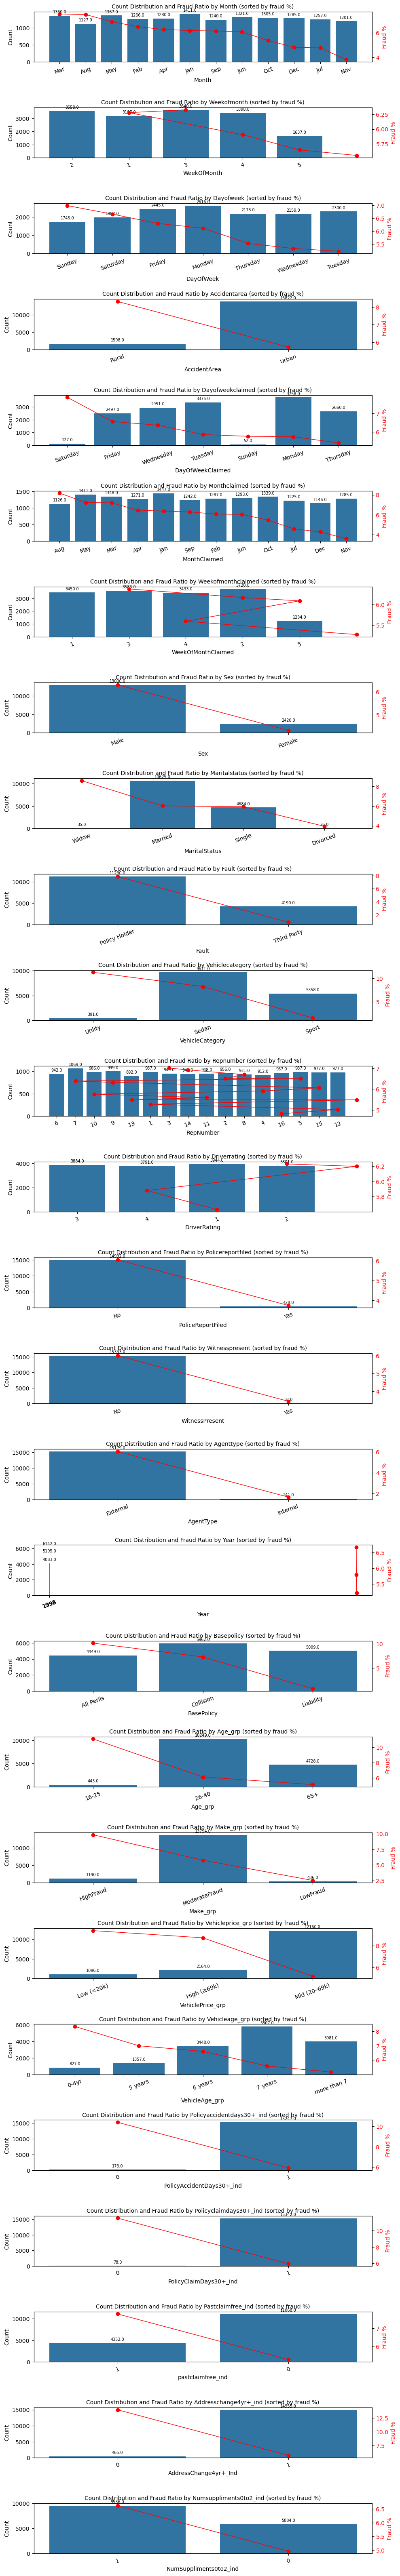

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
cat_col = df4.select_dtypes(include=['object', 'category']).columns.tolist()
# len(cat_col)

rows, cols = 34, 1
fig, axes = plt.subplots(rows, cols, figsize=(10, 80))
axes = axes.flatten()

for i, col in enumerate(cat_col):
    # Compute fraud ratio per category
    fraud_ratio = df4.groupby(col)["FraudFound"].mean() * 100
    
    # Sort categories by fraud ratio descending
    sorted_categories = fraud_ratio.sort_values(ascending=False).index
    
    # Bar plot for counts with sorted categories
    sns.countplot(data=df4, x=col, ax=axes[i], order=sorted_categories)
    axes[i].set_title(f"Count Distribution and Fraud Ratio by {col.capitalize()} (sorted by fraud %)", fontsize=10)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=20)

    # Add counts on top of bars
    for p in axes[i].patches:
        height = p.get_height()
        if height > 0:
            axes[i].annotate(
                f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=7, color='black', xytext=(0, 3),
                textcoords='offset points'
            )

    # Fraud ratio line plot (overlay)
    ax2 = axes[i].twinx()
    ax2.plot(fraud_ratio.loc[sorted_categories].index,
             fraud_ratio.loc[sorted_categories].values,
             color="red", marker="o", linestyle="-", linewidth=1)
    ax2.set_ylabel("Fraud %", fontsize=10, color="red")
    ax2.tick_params(axis='y', labelcolor="red")

# Remove empty subplots if fewer than grid size
for j in range(len(cat_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [44]:
# One-hot encode categorical variables
df4_encoded = pd.get_dummies(df4, columns=cat_col, drop_first=True)
df4_encoded.to_csv("df4_encoded.csv")
df4_encoded.shape

(15420, 91)

In [45]:
df4_encoded.columns

Index(['FraudFound', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan',
       'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'WeekOfMonth_2', 'WeekOfMonth_3',
       'WeekOfMonth_4', 'WeekOfMonth_5', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'AccidentArea_Urban',
       'DayOfWeekClaimed_Monday', 'DayOfWeekClaimed_Saturday',
       'DayOfWeekClaimed_Sunday', 'DayOfWeekClaimed_Thursday',
       'DayOfWeekClaimed_Tuesday', 'DayOfWeekClaimed_Wednesday',
       'MonthClaimed_Aug', 'MonthClaimed_Dec', 'MonthClaimed_Feb',
       'MonthClaimed_Jan', 'MonthClaimed_Jul', 'MonthClaimed_Jun',
       'MonthClaimed_Mar', 'MonthClaimed_May', 'MonthClaimed_Nov',
       'MonthClaimed_Oct', 'MonthClaimed_Sep', 'WeekOfMonthClaimed_2',
       'WeekOfMonthClaimed_3', 'WeekOfMonthClaimed_4', 'WeekOfMonthClaimed_5',
       'Sex_Male', 'MaritalStatus_Married

#### 4.4 Quick Feature Selection and Initial Correlation Review 
 - Top 30 features highly correlated with target / label

In [46]:
import pandas as pd

# Create correlation matrix
corr_matrix = df4_encoded.corr()

# Extract correlations with target only
target_corr = corr_matrix['FraudFound']#.drop('FraudFound')

# Sort by strength of relationship
top_corr = target_corr.abs().sort_values(ascending=False)

# print(top_corr.head(20).to_dict(orient='records'))  # Top 10 correlated features with target
# print(list(top_corr.head(20).items()))
data=list(top_corr.head(30).items())
df = pd.DataFrame(data, columns=['Variable', 'Value'])

for i, (var, val) in enumerate(zip(df['Variable'], df['Value']), start=1):
    print(f"{i}. {var}: {val}")
    #print('"'f"{var}"'"'',')

1. FraudFound: 1.0
2. BasePolicy_Liability: 0.15400657005802473
3. VehicleCategory_Sport: 0.13590259723957615
4. Fault_Third Party: 0.13138922286009166
5. VehiclePrice_grp_Mid (20–69k): 0.06485392176689103
6. AddressChange4yr+_Ind_1: 0.05941205745113159
7. pastclaimfree_ind_1: 0.047680424669586136
8. BasePolicy_Collision: 0.04386014124013901
9. VehiclePrice_grp_Low (<20k): 0.03978656534452585
10. VehicleCategory_Utility: 0.035815364545068354
11. NumSuppliments0to2_ind_1: 0.033878582783686176
12. AccidentArea_Urban: 0.03349946347169286
13. MonthClaimed_Nov: 0.0305800116880635
14. Sex_Male: 0.029953323068743633
15. Make_grp_ModerateFraud: 0.02730115039833295
16. Month_Nov: 0.026408750014684276
17. MonthClaimed_Aug: 0.025849070170264547
18. Make_grp_LowFraud: 0.02490008634857571
19. Age_grp_65+: 0.023126052608421883
20. AgentType_Internal: 0.022978203971163205
21. MonthClaimed_Dec: 0.0204247978763555
22. VehicleAge_grp_more than 7: 0.020172029413872694
23. Month_Mar: 0.019852891028809657


 - Dropped features that highly correlated with each others in this project
     - PCA could be used to reduce the dimenationalty with less interpretability

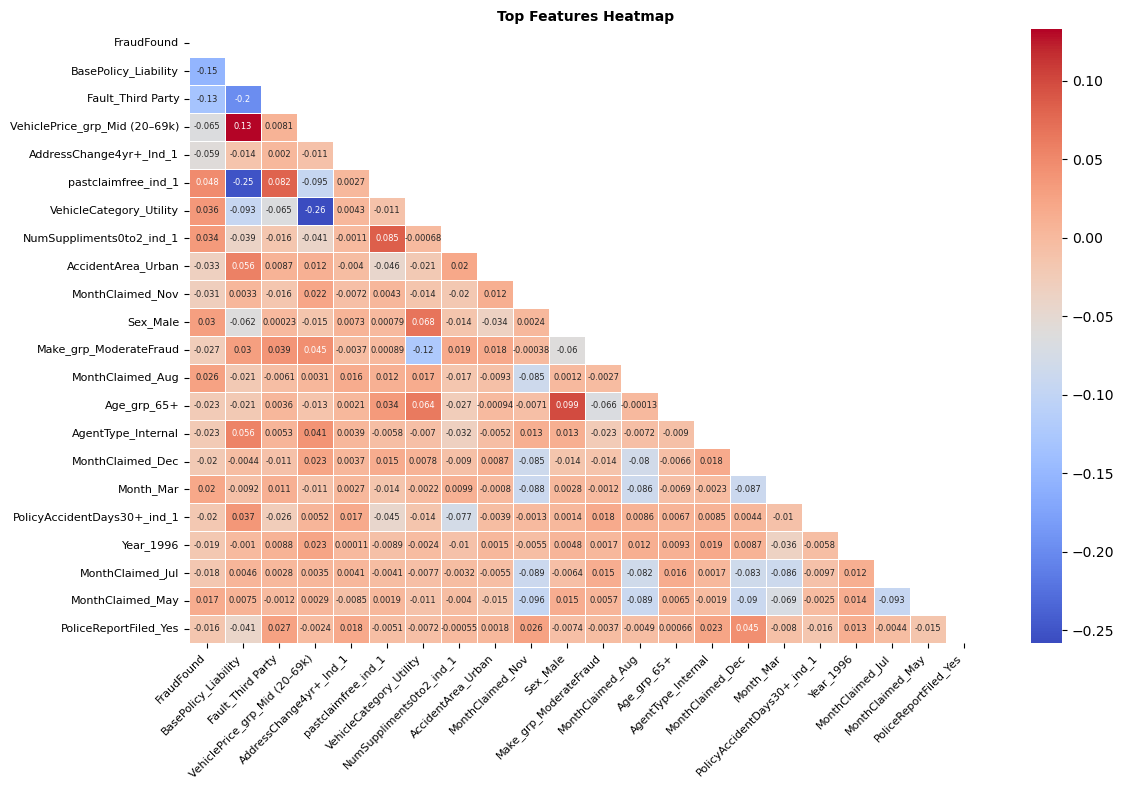

In [40]:
# "BasePolicy_Liability" vs "VehicleCategory_Sport" vs "BasePolicy_Collision"--> drop "VehicleCategory_Sport" "BasePolicy_Collision"
# VehiclePrice_grp_Low (<20k) vs VehiclePrice_grp_Mid (20–69k) --> drop VehiclePrice_grp_Low (<20k)
# MonthClaimed_Nov vs Month_Nov --> drop Month_Nov
# Make_grp_ModerateFraud vs Make_grp_LowFraud --> drop Make_grp_LowFraud
# Age_grp_65+ vs VehicleAge_grp_more than 7 --> drop VehicleAge_grp_more than 7
# MonthClaimed_Aug vs Month_Aug --> drop Month_Aug
# Month_Mar vs MonthClaimed_Mar --> drop MonthClaimed_Mar
# PolicyAccidentDays30+_ind_1 vs PolicyClaimDays30+_ind_1 --> drop PolicyClaimDays30+_ind_1

df4_topcorr = df4_encoded[["FraudFound","BasePolicy_Liability","Fault_Third Party","VehiclePrice_grp_Mid (20–69k)",
"AddressChange4yr+_Ind_1","pastclaimfree_ind_1","VehicleCategory_Utility","NumSuppliments0to2_ind_1",
"AccidentArea_Urban","MonthClaimed_Nov","Sex_Male","Make_grp_ModerateFraud","MonthClaimed_Aug",
"Age_grp_65+","AgentType_Internal","MonthClaimed_Dec","Month_Mar","PolicyAccidentDays30+_ind_1",
"Year_1996","MonthClaimed_Jul","MonthClaimed_May","PoliceReportFiled_Yes"]]


plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df4_topcorr.corr(), dtype=bool))

sns.heatmap(
    df4_topcorr.corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    mask=mask,
    annot_kws={"size": 6, "fontname": "DejaVu Sans"}  # Sleek font for annotations
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8, fontweight='medium', fontname='DejaVu Sans')
plt.yticks(fontsize=8, fontweight='medium', fontname='DejaVu Sans')

plt.title("Top Features Heatmap", fontsize=10, fontweight='bold', fontname='DejaVu Sans')
plt.tight_layout()
plt.show()


#### Data Preparation Summary
##### 1. Data Cleaning:
   - Some minor data cleaning was performed given there were no obvious missing values but some zero and none values;
   - There were 15K unique PolicyNumbers,  which were not included as it is not meaningful for  this analysis
   - 'RepNumber','Deductible' data fields were dropped from this analysis due to insignificant contribution to fraud detection
##### 2. Feature engineering:  avoids inflated fraud % from tiny sample sizes), interpretability (easier to explain risk by broad categories), and model performance (reduces dimensionality and prevents overfitting to rare categories)
 - 4 features were create by regrouping based on similar fraud risk for better stability
 - 5 indicators were created for the high/low risk

##### 3. Encoding: Data was encoded for correlation review and modeling
##### 4. Initial Correlation Review and Quick Feature Selection: 20 binary variables were selected from around 100 binary variables for baseline models   


In [1]:
%pwd

'C:\\Users\\Mei\\BerkeleyPE\\AIandML\\Capstone Project\\KaggleData\\CarClaimFraud'